In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import ipywidgets as widgets 
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn import metrics 
style = {'Descrição_Variaveis':'Initial'}

In [3]:
# Carregar os dados 
file_name = 'Dados/dano.csv'
ds = pd.read_csv(file_name, delimiter=';')
ds.head()

,ID_Veicular,Laterais,Dianteira,Traseira,Teto,Dano_Veicular
0,0,5.1,3.5,1.4,0.2,Dano-Alto
1,1,4.9,3.0,1.4,0.2,Dano-Alto
2,2,4.7,3.2,1.3,0.2,Dano-Alto
3,3,4.6,3.1,1.5,0.2,Dano-Alto
4,4,5.0,3.6,1.4,0.2,Dano-Alto


In [4]:
# Contagem de linhas e colunas 
print(f'Data set tem {ds.shape[0]} linhas e {ds.shape[1]} colunas')

Data set tem 150 linhas e 6 colunas


In [13]:
# Visualizar os dados  
wig_col = widgets.Dropdown(
                            options =[col for col in ds.columns.tolist() if col.startswith(('Laterais','Dianteira','Traseira','Teto'))],
                            description='veja a coluna para os detalhes',
                            disabled=False,
                            layout=widgets.Layout(width='40%', heigth='40px'),
                            style=style   
                            )

Dropdown(description='veja a coluna para os detalhes', index=1, layout=Layout(width='40%'), options=('Laterais…

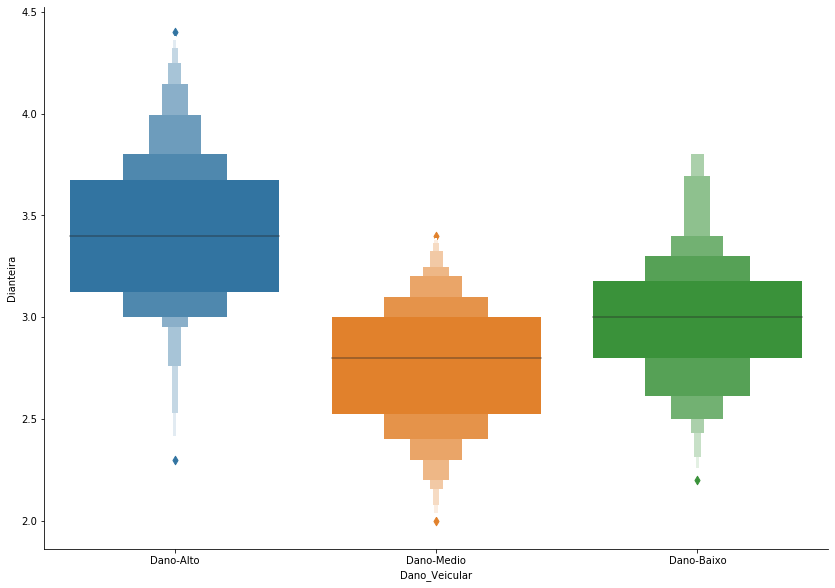

In [18]:
display(wig_col)

sns.catplot(x='Dano_Veicular', y=wig_col.value, kind="boxen", data=ds, height=8.27, aspect=11.7/8.27);

In [19]:
#Separando os dados 
x = ds.iloc[:,:-1].values
y = ds.iloc[:,-1].values


In [24]:
# Transformar as palavras em numeros 
from sklearn.preprocessing import LabelEncoder 

label = LabelEncoder()
ds['Dano_Veicular'] = label.fit_transform(ds['Dano_Veicular'])

In [25]:
#Checando os valores
ds['Dano_Veicular'].unique()

array([0, 2, 1])

In [27]:
# Criar um percentual dinamico para elencar as variaveis de teste
from sklearn.model_selection import train_test_split
teste_size  =  widgets.FloatSlider(min=0.01, max=0.6, value=0.2, description="Teste size", tooltips=['Usally 20-30%'])

display(teste_size)

FloatSlider(value=0.2, description='Teste size', max=0.6, min=0.01)

In [29]:
#Separando os dados de teste de treino 
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=teste_size.value, random_state=7)

In [30]:
# Padronizar as variaveis explicativas
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [32]:
# Construir a maquina preditiva 
from sklearn.neighbors import KNeighborsClassifier

# Configiuração de parametros 
neigh_wig = widgets.Dropdown(options=[1, 10, 30, 100],
                            description="Number of Neighbours", style=style)

display(neigh_wig)

Dropdown(description='Number of Neighbours', options=(1, 10, 30, 100), value=1)

In [34]:
maquina = KNeighborsClassifier(n_neighbors=neigh_wig.value)

maquina =  maquina.fit(x_train, y_train)

y_pred = maquina.predict(x_test)

print("Valores Preditos :\n",y_pred)
print("Valores Preditos :\n",y_test)

Valores Preditos :
 ['Dano-Baixo' 'Dano-Medio' 'Dano-Alto' 'Dano-Baixo' 'Dano-Medio'
 'Dano-Alto' 'Dano-Alto' 'Dano-Alto' 'Dano-Alto' 'Dano-Baixo' 'Dano-Baixo'
 'Dano-Medio' 'Dano-Baixo' 'Dano-Baixo' 'Dano-Medio' 'Dano-Alto'
 'Dano-Medio' 'Dano-Medio' 'Dano-Baixo' 'Dano-Alto' 'Dano-Alto'
 'Dano-Alto' 'Dano-Baixo' 'Dano-Alto' 'Dano-Baixo' 'Dano-Medio'
 'Dano-Medio' 'Dano-Medio' 'Dano-Alto' 'Dano-Alto' 'Dano-Alto'
 'Dano-Medio' 'Dano-Baixo' 'Dano-Medio' 'Dano-Medio' 'Dano-Alto'
 'Dano-Baixo' 'Dano-Alto' 'Dano-Alto' 'Dano-Baixo' 'Dano-Baixo'
 'Dano-Alto' 'Dano-Baixo' 'Dano-Alto' 'Dano-Medio' 'Dano-Baixo'
 'Dano-Medio' 'Dano-Alto' 'Dano-Medio' 'Dano-Alto' 'Dano-Baixo'
 'Dano-Baixo' 'Dano-Medio' 'Dano-Alto' 'Dano-Alto' 'Dano-Medio'
 'Dano-Baixo' 'Dano-Alto' 'Dano-Baixo' 'Dano-Baixo' 'Dano-Medio'
 'Dano-Alto' 'Dano-Medio' 'Dano-Alto' 'Dano-Baixo' 'Dano-Baixo'
 'Dano-Alto' 'Dano-Alto' 'Dano-Baixo' 'Dano-Medio' 'Dano-Baixo'
 'Dano-Baixo' 'Dano-Medio' 'Dano-Alto' 'Dano-Alto' 'Dano-Baixo'
 'Dano

In [38]:
print('Acuracia = ',metrics.accuracy_score(y_test, y_pred))

Acuracia =  0.9666666666666667


In [39]:
print('Real vs predito \n ----------------------- \n')

erro = pd.DataFrame({'Real': y_test,'Predito':y_pred}) 

erro

Real vs predito 
 ----------------------- 



,Real,Predito
0,Dano-Baixo,Dano-Baixo
1,Dano-Medio,Dano-Medio
2,Dano-Alto,Dano-Alto
3,Dano-Baixo,Dano-Baixo
4,Dano-Medio,Dano-Medio
...,...,...
115,Dano-Baixo,Dano-Baixo
116,Dano-Medio,Dano-Medio
117,Dano-Baixo,Dano-Baixo
118,Dano-Medio,Dano-Medio


In [40]:
# usando a confusion matrix para avaliar a acuracia e demais indicadores
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(cm)
print(cr)

[[43  0  0]
 [ 0 39  0]
 [ 0  4 34]]
              precision    recall  f1-score   support

   Dano-Alto       1.00      1.00      1.00        43
  Dano-Baixo       0.91      1.00      0.95        39
  Dano-Medio       1.00      0.89      0.94        38

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120

